密码算法中的两个组件：
线性层、非线性层
有限域上任何一个映射都可以用单变元多项式表示出来
给出一个单变元多项式，如何表示成向量值布尔函数
给出一个向量值布尔函数，如何写成扩域上的单变元多项式
有限域上的单变元多项式最主要的用途：设计S盒
多变元多项式：把恢复密钥转换成求解非线性多变元方程组——代数攻击——NP问题

这里不考虑符号多项式了

In [1]:
# 定义单变元多项式环，方法一
f = GF(5^3,'a')['x']
f

Univariate Polynomial Ring in x over Finite Field in a of size 5^3

In [6]:
# 推荐这种写法
# 定义单变元多项式环，方括号表示多项式（方法2）
R.<t> = GF(2)[]
R

Univariate Polynomial Ring in t over Finite Field of size 2 (using GF2X)

In [5]:
# 定义单变元多项式环，方法三
# 第一个参数放系数取值范围，第二个参数放未定元，可以是一个也可以是多个
R = PolynomialRing(QQ, 'x')
# 拉格朗日插值，括号里放点的坐标
# n个点，确定一个n-1次多项式
# 注意给的点应该是有限域上的点
f = R.lagrange_polynomial([(0,1),(2,2),(3,-2),(-4,9)])
f

-23/84*x^3 - 11/84*x^2 + 13/7*x + 1

In [8]:
# 表示多变元多项式环
# 声明布尔多项式环，三个变量的次数最多是1次的
# 布尔多项式：单项式的系数是F2上的，其中变元的次数也只能是0或1，
R.<x,y,z> = BooleanPolynomialRing()
R
p = x*y + y*z + x*z
x * p
# 在处理多变元的时候存在“序”的问题
# 字典序，把每一个单项式里面变元上面的次数表示成一个序列，按照这个序列排序
# 反字典序
# 密码里，字典序和反字典序是不常用的
# FGLM把一种序下的Grobner基变成另一种序下的Grobner基

x*y*z + x*y + x*z

In [11]:
# 如果要声明的变量很多
# 第一个参数表示声明10个变量
# 第二个参数表示，以x，X_0,X_1,...,X_9，这里编号是从0 开始的
# 第三个参数表示用什么样的序，degneglex分次反字典序，lex字典序，neglex反字典序
R = BooleanPolynomialRing(10,'x',order='degneglex')
R

Boolean PolynomialRing in x0, x1, x2, x3, x4, x5, x6, x7, x8, x9

椭圆曲线：三次曲线
完整的维尔斯特拉斯方程，不管定义在什么域上都可以写成这种形式
y_2+a_1xy+a_3y=x^3+a_2x^2+a_4x+a_6
EllipticCurve([a_1,a_2,a_3,a_4,a_6])

在特征0的域上是可以把a_1,a_2,a_3=0的，当特征为2时，a_1这个项是消不掉的
在特征为3时，有时候能把a_2这个项消掉，有时候能把a_4这个项消掉，不一定
认为a_1,a_2,a_3=0
EllipticCurve([a_4,a_6])

In [21]:
# 声明椭圆曲线——方法1
# 第一个参数，系数取值范围
E = EllipticCurve(GF(13),[3,8])
# GF(13)上的点也只有有限个，所以可以用.points把点都打印出来
E.points()
# 代数几何里两种坐标表示：仿射坐标、射影坐标
# 射影坐标(x,y,z)：在二维平面中给它添加一个无穷远点，其实是表示的二维平面

[(0 : 1 : 0), (1 : 5 : 1), (1 : 8 : 1), (2 : 3 : 1), (2 : 10 : 1), (9 : 6 : 1), (9 : 7 : 1), (12 : 2 : 1), (12 : 11 : 1)]

In [22]:
# 在椭圆曲线上可以定义点的加法，就是说两个点连成的直线和椭圆曲线交到了第三个点，然后把第三个点关于x轴对称到椭圆曲线上，这个点就是两个点相加的结果
# 一个点加上它自己，就叫倍点
E(1,5) + E(1,8)

(0 : 1 : 0)

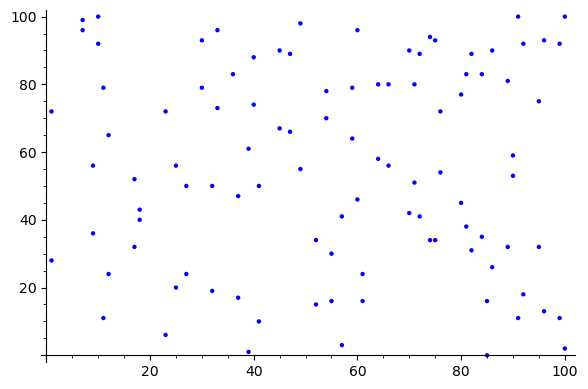

In [15]:
# 声明椭圆曲线——方法2，用代数表达式生成一个椭圆曲线
# 先实例化一个多项式环
F.<x,y> = GF(101)[]
# 这种方式定义的椭圆曲线需要写成等于0的形式
E = EllipticCurve(x^3 + x^2 + 2 - y^2 -y*x)
E
# 有限域上的椭圆曲线画出来没什么含义，只是一个形象的表示，实数域上的就可以比较像实际看到的
# 椭圆曲线实质上是救生圈
# 格也是从椭圆曲线上来的
E.plot()


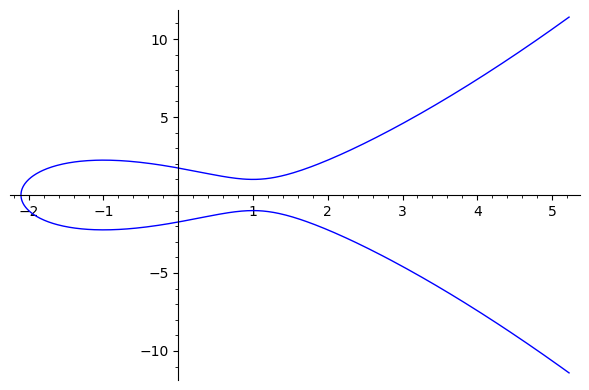

In [16]:
# 用的短的维尔斯特拉斯方程，只有a_4,a_6不等于0
E = EllipticCurve([-3,3])
E.plot()

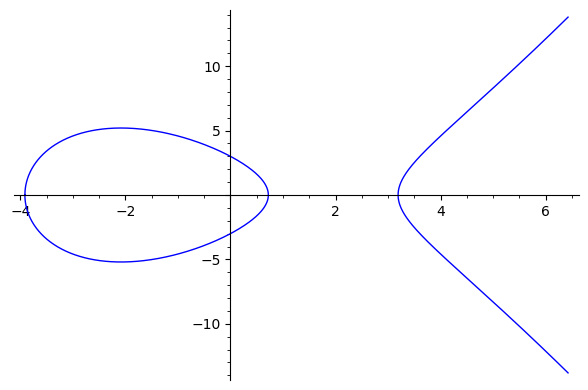

In [17]:
# 椭圆曲线可能画出来会有两个分支
E = EllipticCurve([-13,9])
E.plot()

In [ ]:
# 密码学中用的主要就是椭圆曲线的倍点运算，取一个点，它的倍数可以构成一个群，来类比到有限域上的方幂，以及循环群的子群
# 基于同源的
E = EllipticCurve(GF(15424654874903),[16546484,])
G = 
